In [1]:
import pandas as pd
import numpy as np

# Replacing -999 with NaN in HURDAT2

In [2]:
df_hurdat2 = pd.read_csv('datasets/hurdat2_formatted.csv')
df_hurdat2['datetime'] = pd.to_datetime(df_hurdat2['datetime'])
df_hurdat2.replace(-999, np.nan, inplace=True)
df_hurdat2.head(5)

,storm_id,storm_name,num_of_obs,datetime,category,record_identifier,status_of_system,latitude,longitude,maximum_sustained_wind_knots,...,34_kt_nw_nm,50_kt_ne_nm,50_kt_se_nm,50_kt_sw_nm,50_kt_nw_nm,64_kt_ne_nm,64_kt_se_nm,64_kt_sw_nm,64_kt_nw_nm,radius_of_max_wind_nm
0,AL011851,UNNAMED,14,1851-06-25 12:00:00,1,NaN,HU,28.0N,96.0W,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AL011851,UNNAMED,14,1851-06-25 18:00:00,1,NaN,HU,28.1N,96.5W,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AL011851,UNNAMED,14,1851-06-25 21:00:00,1,L,HU,28.2N,96.8W,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL011851,UNNAMED,14,1851-06-26 00:00:00,1,NaN,HU,28.2N,97.0W,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL011851,UNNAMED,14,1851-06-26 06:00:00,Tropical Storm,NaN,TS,28.3N,97.6W,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Grouping HURDAT2 by storm_id

In [3]:
grouped_df = df_hurdat2.groupby(['storm_id']).agg({
    'maximum_sustained_wind_knots': ['mean', 'max'],
    'central_pressure_mb': ['mean', 'min'],
    'radius_of_max_wind_nm': ['mean', 'max']
}).reset_index()
print("Number of unique storms:", len(grouped_df))

grouped_df_without_nan = grouped_df.dropna()

print("Number of unique storms without NaN:", len(grouped_df_without_nan))

Number of unique storms: 715
Number of unique storms without NaN: 206


In [4]:
grouped_df_without_nan.head(5)

storm_id maximum_sustained_wind_knots      central_pressure_mb         \
                                     mean  max                mean    min   
1   AL011852                    57.777778  100               961.0  961.0   
3   AL011856                    84.444444  130               934.0  934.0   
24  AL011900                    57.333333  120               936.0  936.0   
32  AL011915                    44.444444   65               996.5  990.0   
34  AL011918                    68.571429  105               955.0  955.0   

   radius_of_max_wind_nm        
                    mean   max  
1                   10.0  10.0  
3                   10.0  10.0  
24                  15.0  15.0  
32                  15.0  15.0  
34                  10.0  10.0

In [5]:
grouped_df_without_nan.to_csv('datasets/hurdat2_grouped.csv', index=False)

# Classifying storms into categories

In [6]:
def  classify_category(wind_speed):
    if wind_speed <= 33:
        return "Tropical Depression"
    elif 34 <= wind_speed <= 63:
        return "Tropical Storm"
    elif 64 <= wind_speed <= 82:
        return 1
    elif 83 <= wind_speed <= 95:
        return 2
    elif 96 <= wind_speed <= 112:
        return 3
    elif 113 <= wind_speed <= 136:
        return 4
    elif wind_speed >= 137:
        return 5
    return "Unknown"

In [7]:
grouped_df_without_nan['category'] = grouped_df_without_nan['maximum_sustained_wind_knots']['max'].apply(classify_category)
grouped_df['category'] = grouped_df['maximum_sustained_wind_knots']['max'].apply(classify_category)

C:\Users\jaych\AppData\Local\Temp\ipykernel_41276\25845270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df_without_nan['category'] = grouped_df_without_nan['maximum_sustained_wind_knots']['max'].apply(classify_category)


In [8]:
grouped_df_without_nan.head(5)

storm_id maximum_sustained_wind_knots      central_pressure_mb         \
                                     mean  max                mean    min   
1   AL011852                    57.777778  100               961.0  961.0   
3   AL011856                    84.444444  130               934.0  934.0   
24  AL011900                    57.333333  120               936.0  936.0   
32  AL011915                    44.444444   65               996.5  990.0   
34  AL011918                    68.571429  105               955.0  955.0   

   radius_of_max_wind_nm       category  
                    mean   max           
1                   10.0  10.0        3  
3                   10.0  10.0        4  
24                  15.0  15.0        4  
32                  15.0  15.0        1  
34                  10.0  10.0        3

# Exploring resource dataset

In [9]:
df_resource = pd.read_csv('datasets/resource_dataset_with_category.csv')

Adding storm_id to resource data

In [10]:
df_hurdat2['year'] = df_hurdat2['datetime'].dt.year.astype(str)
df_resource['year'] = df_resource['year'].astype(str)
df_hurdat2_unique = df_hurdat2.drop_duplicates(subset=['storm_name', 'year', 'storm_id'])
df_resources_with_id = df_resource.merge(
    df_hurdat2_unique[['storm_id', 'year', 'storm_name']], on=['storm_name', 'year'], how='left')

In [11]:
df_resources_with_id.head(5)

,storm_name,category,year,shelters,meals_millions,water_million_gallons,fuel_million_gallons,storm_id
0,CHARLEY,3,2004,250,2.0,0.3,0.1,AL032004
1,FRANCES,3,2004,250,3.5,1.5,0.2,AL062004
2,IVAN,3,2004,120,2.0,0.7,0.2,AL092004
3,JEANNE,-1,2004,200,4.0,1.5,0.2,AL112004
4,DENNIS,-1,2005,70,1.0,0.5,0.1,AL042005


Dropping storms from resource data that are not in HURDAT2 grouped data without missing values

In [12]:
df_resources_with_id['exists_in_hurdat2'] = df_resources_with_id['storm_id'].isin(grouped_df_without_nan['storm_id'])
df_resources_with_id = df_resources_with_id[df_resources_with_id['exists_in_hurdat2']]
df_resources_with_id = df_resources_with_id.drop(columns=['exists_in_hurdat2'])

In [13]:
df_resources_with_id.head(5)

,storm_name,category,year,shelters,meals_millions,water_million_gallons,fuel_million_gallons,storm_id
0,CHARLEY,3,2004,250,2.0,0.3,0.1,AL032004
1,FRANCES,3,2004,250,3.5,1.5,0.2,AL062004
2,IVAN,3,2004,120,2.0,0.7,0.2,AL092004
3,JEANNE,-1,2004,200,4.0,1.5,0.2,AL112004
4,DENNIS,-1,2005,70,1.0,0.5,0.1,AL042005


Unnesting the nested mean/max columns

In [14]:
df_resources_with_id.to_csv('datasets/resource_dataset_with_id_category.csv', index=False)

In [15]:
grouped_df_selected = grouped_df_without_nan[[
    ('storm_id', ''),
    ('maximum_sustained_wind_knots', 'max'),
    ('maximum_sustained_wind_knots', 'mean'),
    ('central_pressure_mb', 'min'),
    ('central_pressure_mb', 'mean'),
    ('radius_of_max_wind_nm', 'max'),
    ('radius_of_max_wind_nm', 'mean')]]

grouped_df_selected.columns =  [
    'storm_id',
    'maximum_sustained_wind_knots_max',
    'maximum_sustained_wind_knots_mean',
    'central_pressure_mb_min',
    'central_pressure_mb_mean',
    'radius_of_max_wind_nm_max',
    'radius_of_max_wind_nm_mean']

In [16]:
grouped_df_selected.head(5)

,storm_id,maximum_sustained_wind_knots_max,maximum_sustained_wind_knots_mean,central_pressure_mb_min,central_pressure_mb_mean,radius_of_max_wind_nm_max,radius_of_max_wind_nm_mean
1,AL011852,100,57.777778,961.0,961.0,10.0,10.0
3,AL011856,130,84.444444,934.0,934.0,10.0,10.0
24,AL011900,120,57.333333,936.0,936.0,15.0,15.0
32,AL011915,65,44.444444,990.0,996.5,15.0,15.0
34,AL011918,105,68.571429,955.0,955.0,10.0,10.0


Adding the unnested columns to resource data

In [17]:
df_resources_with_storm_features = df_resources_with_id.merge(
    grouped_df_selected, on='storm_id', how='left')

In [18]:
df_resources_with_storm_features.to_csv('datasets/resource_dataset_with_id_category_storm_features.csv', index=False)

Graphs to check distribution of data

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

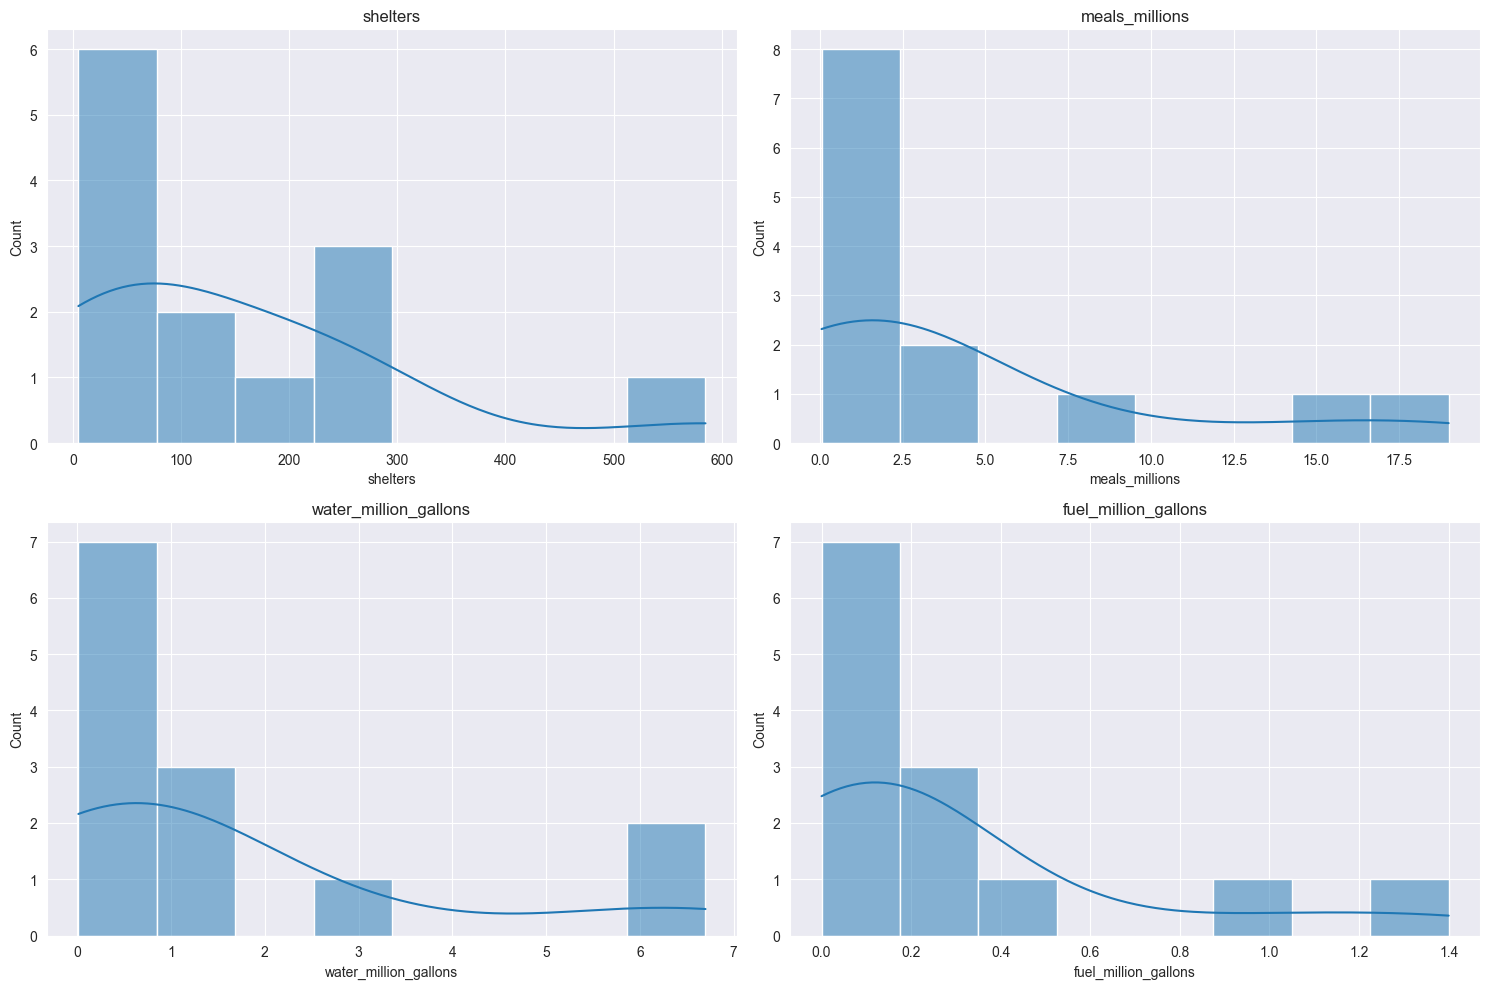

In [20]:
# columns_to_show = list(df_resources_with_storm_features.columns[8:])
columns_to_show = list(df_resources_with_storm_features.columns[3:7])

num_of_features = len(columns_to_show)

num_rows = int(np.ceil(num_of_features / 2))

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(columns_to_show):
    sns.histplot(df_resources_with_storm_features[column], ax=axes[i], kde=True, bins=8)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

# Checking Skewness and Kurtosis (Tail Heaviness)

In [21]:
for col in columns_to_show:
    skewness = df_resources_with_storm_features[col].skew()
    kurtosis = df_resources_with_storm_features[col].kurtosis()
    print("Feature: ", col)
    print("\tskewness: ", skewness)
    print("\tkurtosis: ", kurtosis)
    print("\n")

Feature:  shelters
	skewness:  1.7204261117288742
	kurtosis:  3.5914377187123265


Feature:  meals_millions
	skewness:  1.7662410575475649
	kurtosis:  2.210347416165002


Feature:  water_million_gallons
	skewness:  1.671205778947969
	kurtosis:  1.6999285058866849


Feature:  fuel_million_gallons
	skewness:  1.984894843635049
	kurtosis:  3.261261168115682




# Generate data using Gamma distribution on this small resource dataset

Calculate gamma parameters

In [22]:
mean = df_resources_with_storm_features[columns_to_show].mean()
print("Mean: \n", mean)
print("\n")

variance = df_resources_with_storm_features[columns_to_show].var()
print("Variance: \n", variance)
print("\n")

# shape parameter of gamma distribution
alpha = (mean**2)/variance
print("Alpha: \n", alpha)
print("\n")

#scale parameter of gamma distribution
beta = variance/(mean**2)
print("Beta: \n", beta)

Mean: 
 shelters                 150.307692
meals_millions             4.373077
water_million_gallons      1.666154
fuel_million_gallons       0.303846
dtype: float64


Variance: 
 shelters                 26230.397436
meals_millions              36.766090
water_million_gallons        5.019476
fuel_million_gallons         0.181026
dtype: float64


Alpha: 
 shelters                 0.861306
meals_millions           0.520148
water_million_gallons    0.553059
fuel_million_gallons     0.509997
dtype: float64


Beta: 
 shelters                 1.161027
meals_millions           1.922530
water_million_gallons    1.808124
fuel_million_gallons     1.960797
dtype: float64


Generate data using the above params

In [23]:
from scipy.stats import gamma

resource_data_gamma = {
    col: gamma.rvs(alpha[col], scale=beta[col], size=800) for col in columns_to_show
}

Verify synthesized data using Kolmogorov-Smirnov test

In [31]:
from scipy.stats import kstest

for col in columns_to_show:
    ks_stat, ks_p = kstest(
        resource_data_gamma[col],
        df_resources_with_storm_features[col],
    )
    print(f"Kolmogorov-Smirnov test for '{col}': Stats={ks_stat} | p={ks_p}")
    print("\n")

Kolmogorov-Smirnov test for 'shelters': Stats=0.99625 | p=1.1329299905707108e-25


Kolmogorov-Smirnov test for 'meals_millions': Stats=0.39096153846153847 | p=0.02852776191437585


Kolmogorov-Smirnov test for 'water_million_gallons': Stats=0.20048076923076924 | p=0.6122959978532893


Kolmogorov-Smirnov test for 'fuel_million_gallons': Stats=0.4417307692307692 | p=0.008646326716149514




Verify synthesized data using Anderson-Darling test

In [33]:
from scipy.stats import anderson_ksamp

for col in resource_data_gamma:
    ad_test = anderson_ksamp([df_resources_with_storm_features[col], resource_data_gamma[col]])
    ad_stat, ad_critical, ad_significance = ad_test.statistic, ad_test.critical_values, ad_test.significance_level

    print(f"AD Test for {col}:")
    print(f"  Statistic = {ad_stat:.4f}")
    print(f"  Critical Values = {ad_critical}")
    print(f"  Significance Levels = {ad_significance}\n")

AD Test for shelters:
  Statistic = 61.6679
  Critical Values = [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
  Significance Levels = 0.001

AD Test for meals_millions:
  Statistic = 6.5244
  Critical Values = [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
  Significance Levels = 0.001026896698841078

AD Test for water_million_gallons:
  Statistic = 0.1215
  Critical Values = [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
  Significance Levels = 0.25

AD Test for fuel_million_gallons:
  Statistic = 4.0398
  Critical Values = [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
  Significance Levels = 0.007798551251300293



C:\Users\jaych\AppData\Local\Temp\ipykernel_41276\445118888.py:4: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  ad_test = anderson_ksamp([df_resources_with_storm_features[col], resource_data_gamma[col]])
C:\Users\jaych\AppData\Local\Temp\ipykernel_41276\445118888.py:4: UserWarning: p-value capped: true value larger than 0.25. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  ad_test = anderson_ksamp([df_resources_with_storm_features[col], resource_data_gamma[col]])


Scatter plot to check relationship between two columns

<Figure size 800x600 with 0 Axes>

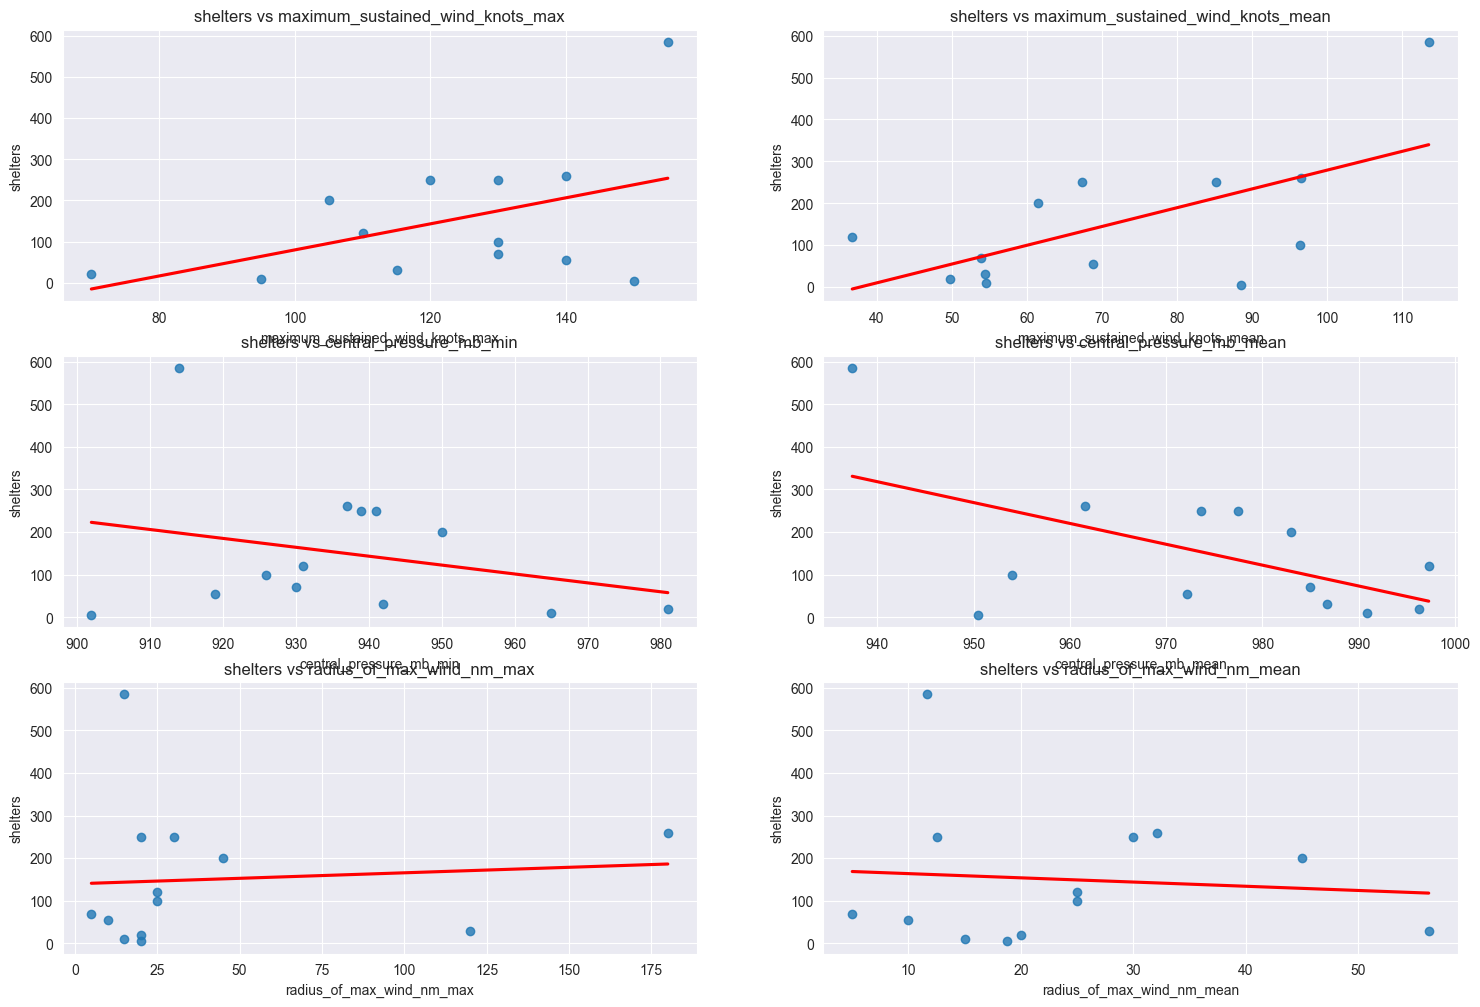

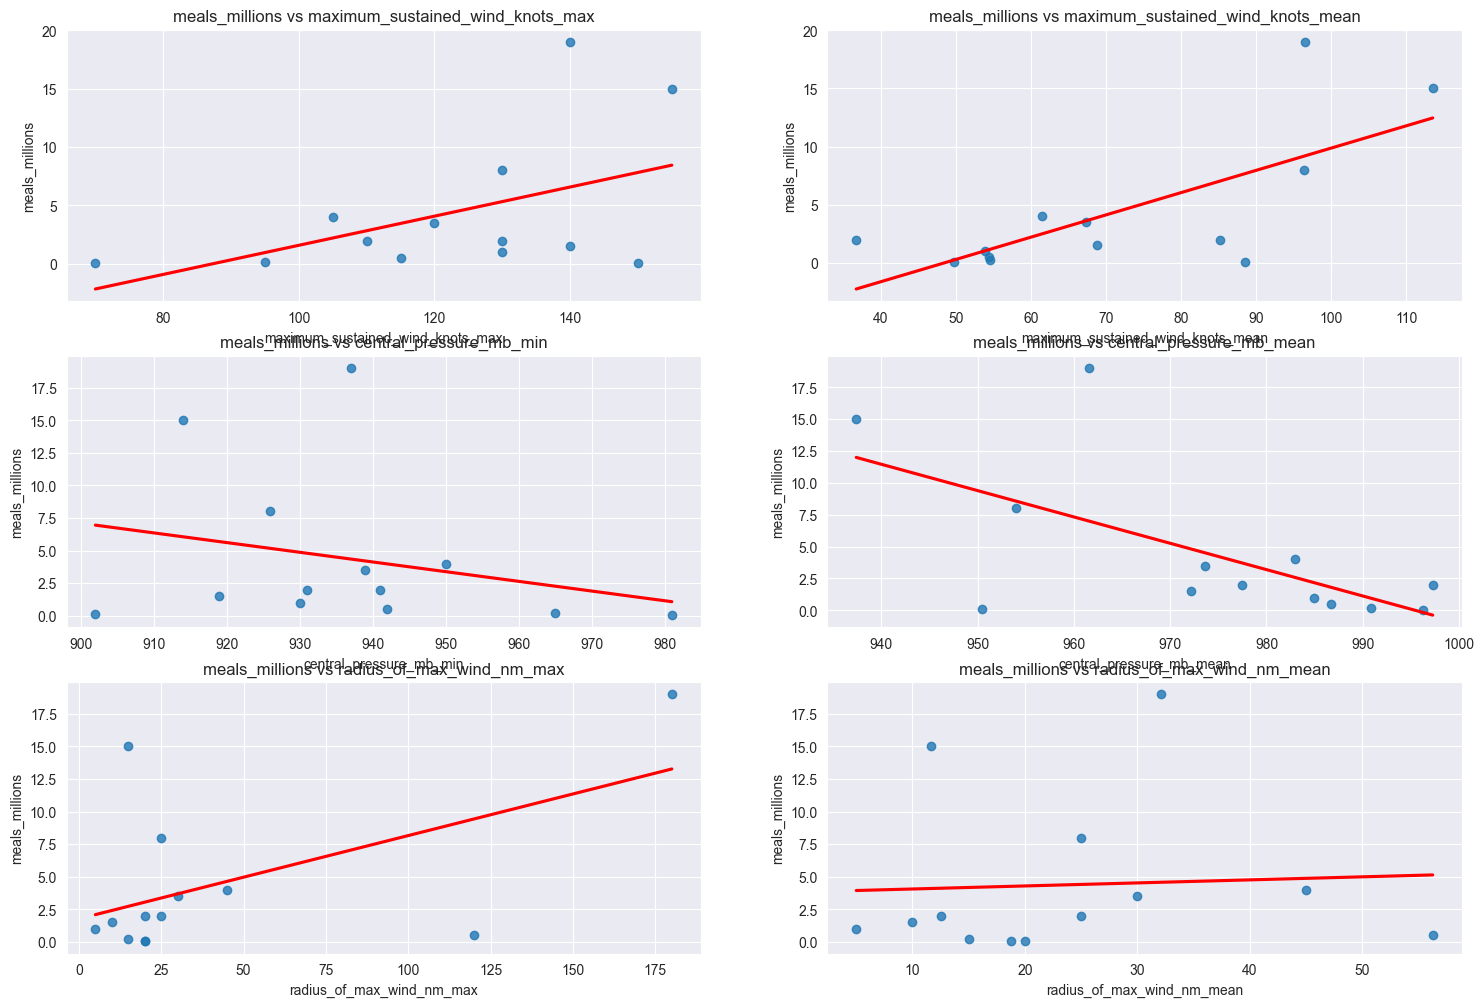

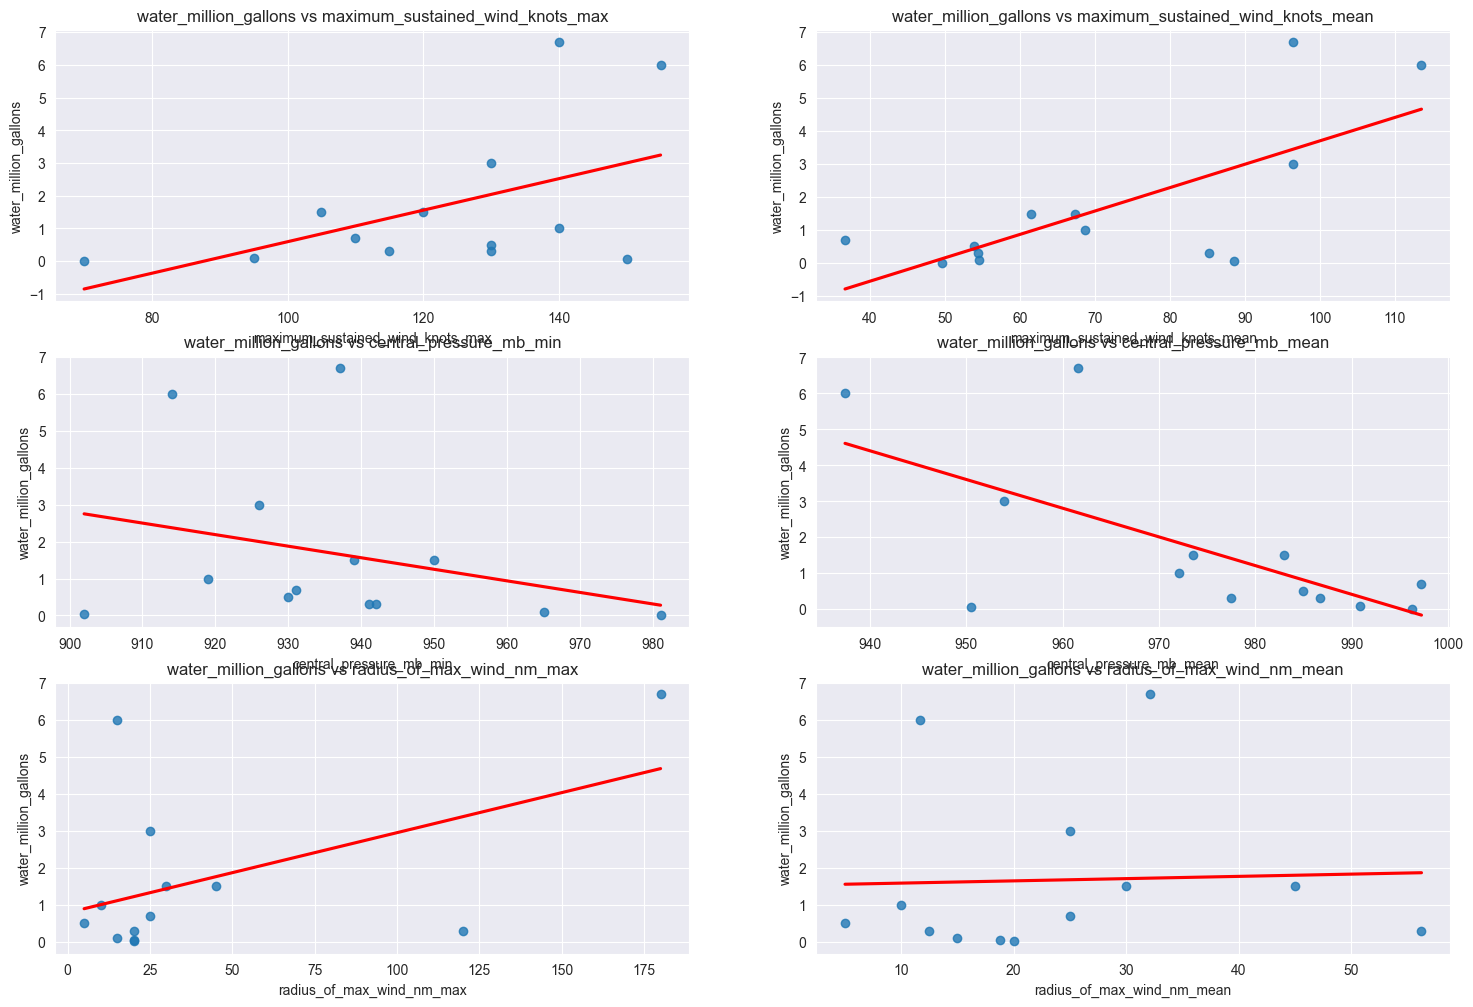

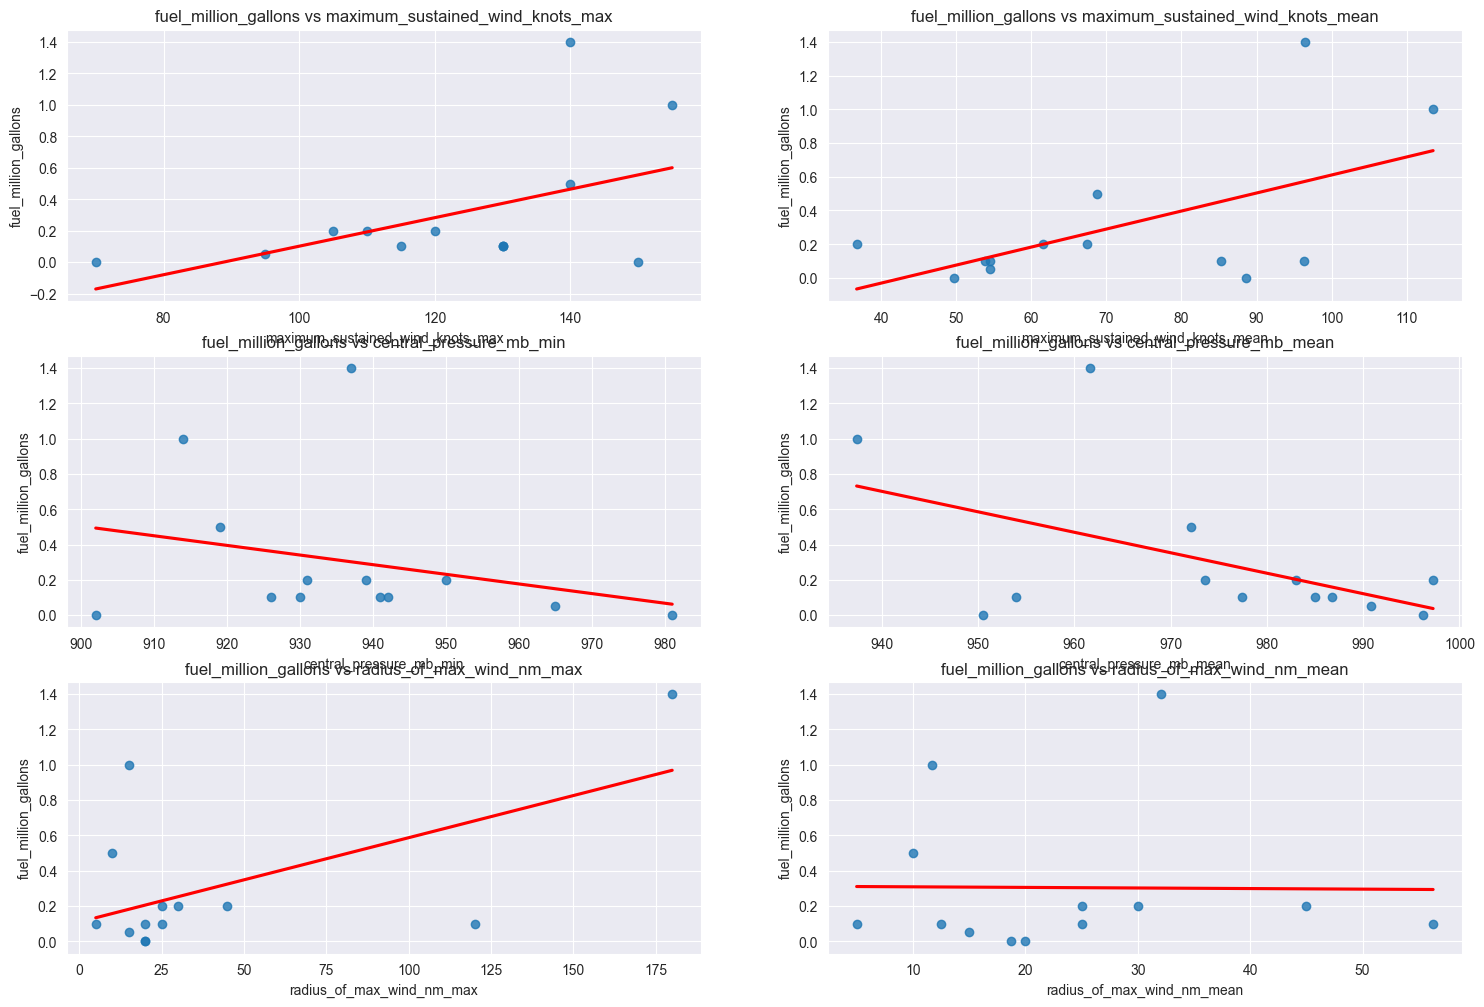

In [24]:
plt.figure(figsize=(8, 6))

x_axis = list(df_resources_with_storm_features.columns[8:])
y_axis = list(df_resources_with_storm_features.columns[3:7])
# y_axis = ['shelters']


for y_feature in y_axis:
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))

    axes = axes.flatten()
    for i, x_feature in enumerate(x_axis):
        sns.regplot(
            x=df_resources_with_storm_features[x_feature],
            y=df_resources_with_storm_features[y_feature],
            scatter=True,
            fit_reg=True,
            line_kws={'color': 'red'},
            ci=None,
            ax=axes[i]
        )

        axes[i].set_title(f'{y_feature} vs {x_feature}')
        axes[i].set_xlabel(x_feature)
        axes[i].set_ylabel(y_feature)

    plt.show()

# Random Forest(Regression) based Data Synthesis

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the columns to be used for training
X = df_resources_with_storm_features[list(df_resources_with_storm_features.columns[8:])]
Y = df_resources_with_storm_features[list(df_resources_with_storm_features.columns[3:7])]

# Generate splits
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the model
model_random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
model_random_forest.fit(X_train, Y_train)

# Predict
Y_pred = model_random_forest.predict(grouped_df_selected[list(df_resources_with_storm_features.columns[8:])])
Y_pred_df = pd.DataFrame(Y_pred,
                         columns = ['shelters',
                         'meals_millions',
                         'water_million_gallons',
                         'fuel_million_gallons'])

Y_pred_df

,shelters,meals_millions,water_million_gallons,fuel_million_gallons
0,79.70,1.8105,0.7575,0.1195
1,172.35,4.3430,1.7615,0.2550
2,131.60,3.2950,1.3414,0.2070
3,23.60,0.2510,0.1046,0.0285
4,122.65,2.8625,1.1691,0.1655
...,...,...,...,...
201,126.30,2.2395,0.8783,0.1390
202,133.40,2.3660,0.9136,0.1490
203,142.85,6.5745,2.5106,0.1650
204,75.60,1.7650,0.7054,0.0870


Plot graph to check trends

<Figure size 800x600 with 0 Axes>

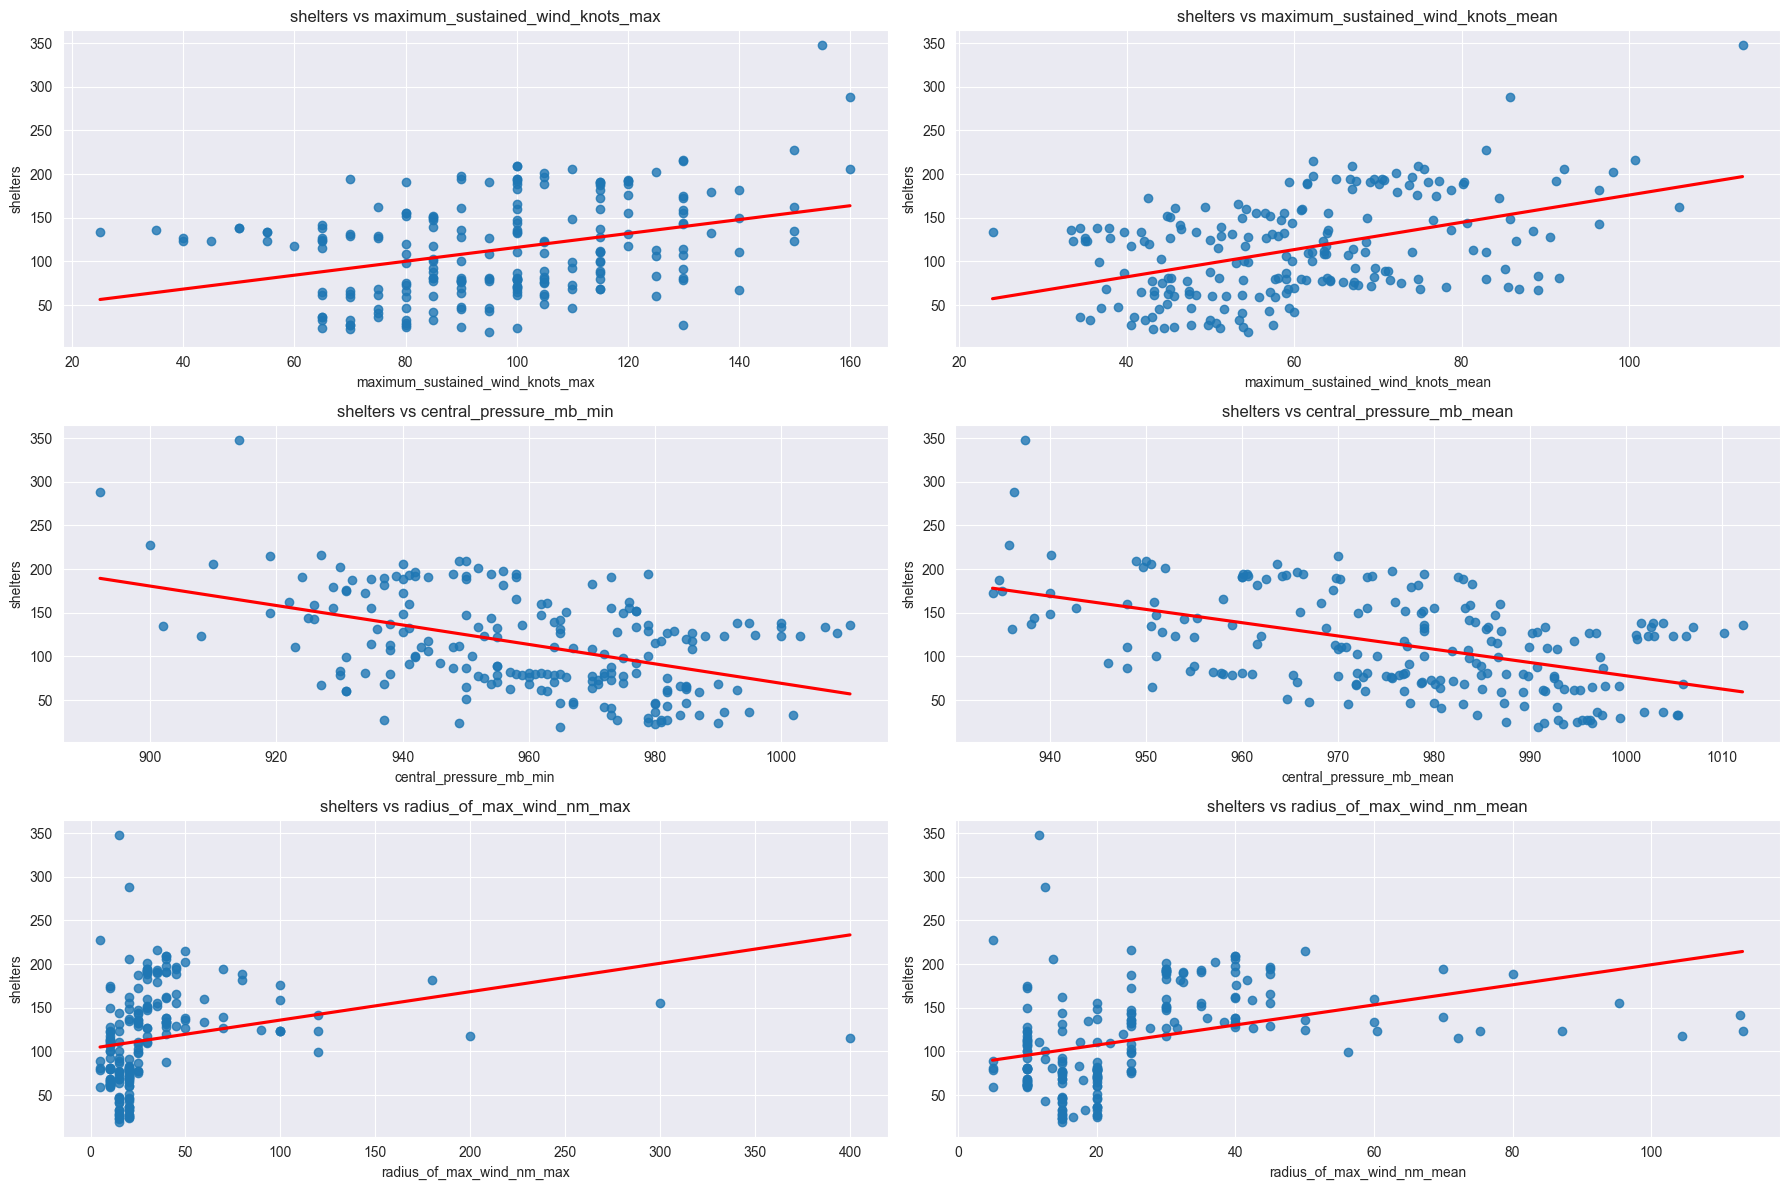

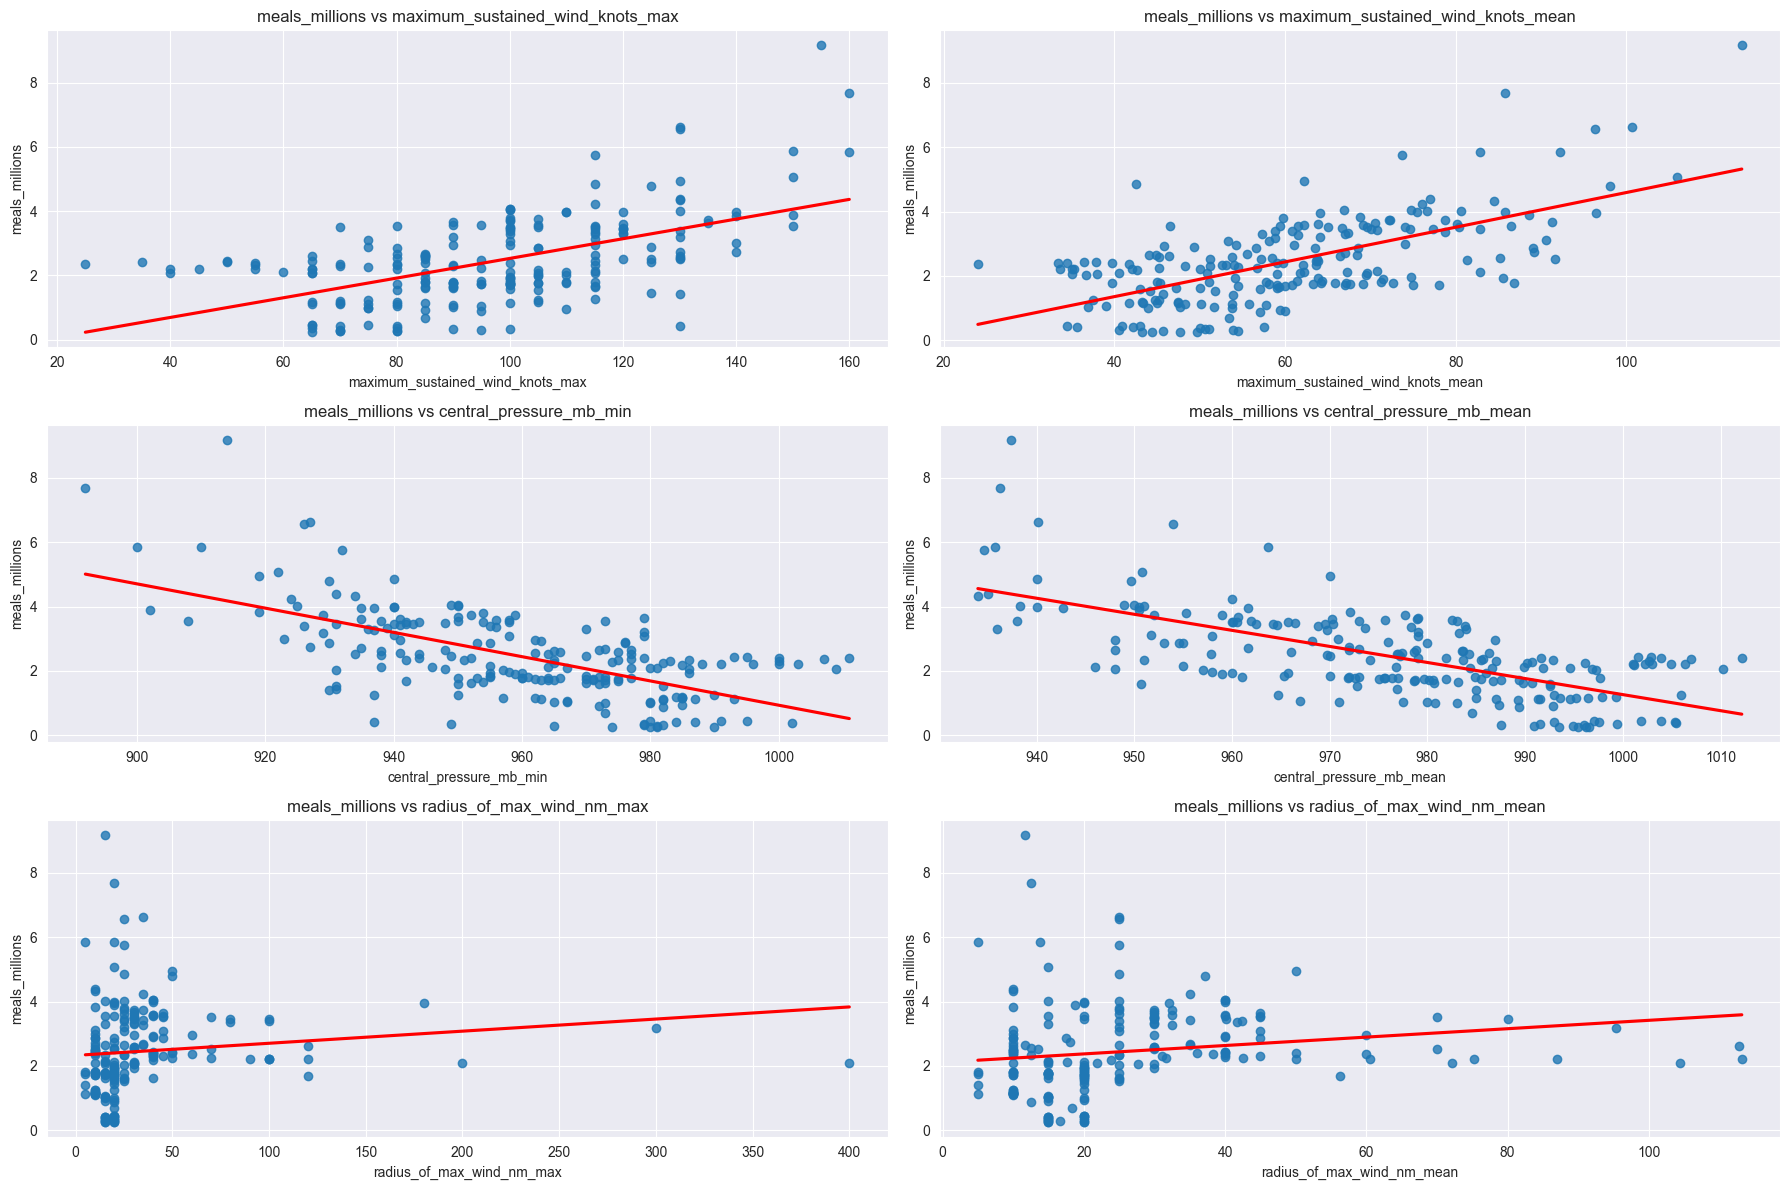

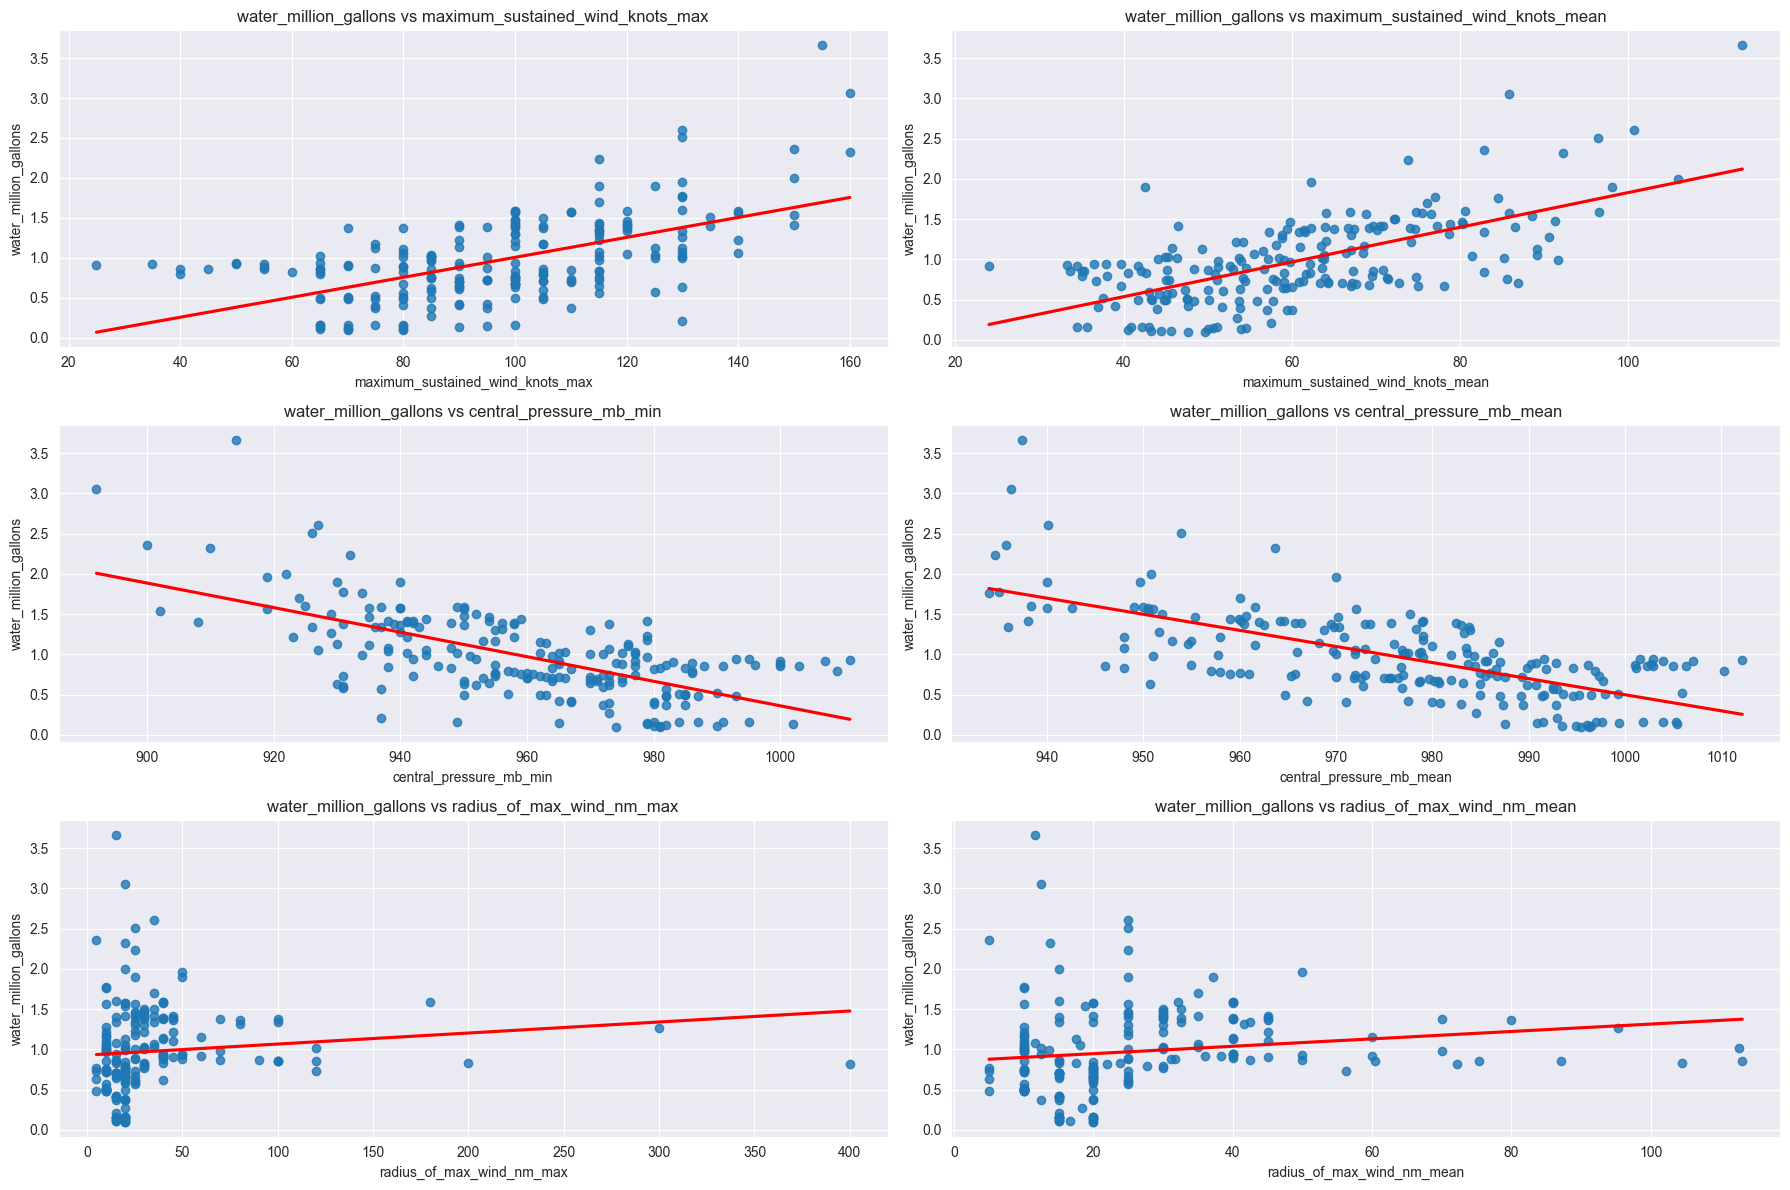

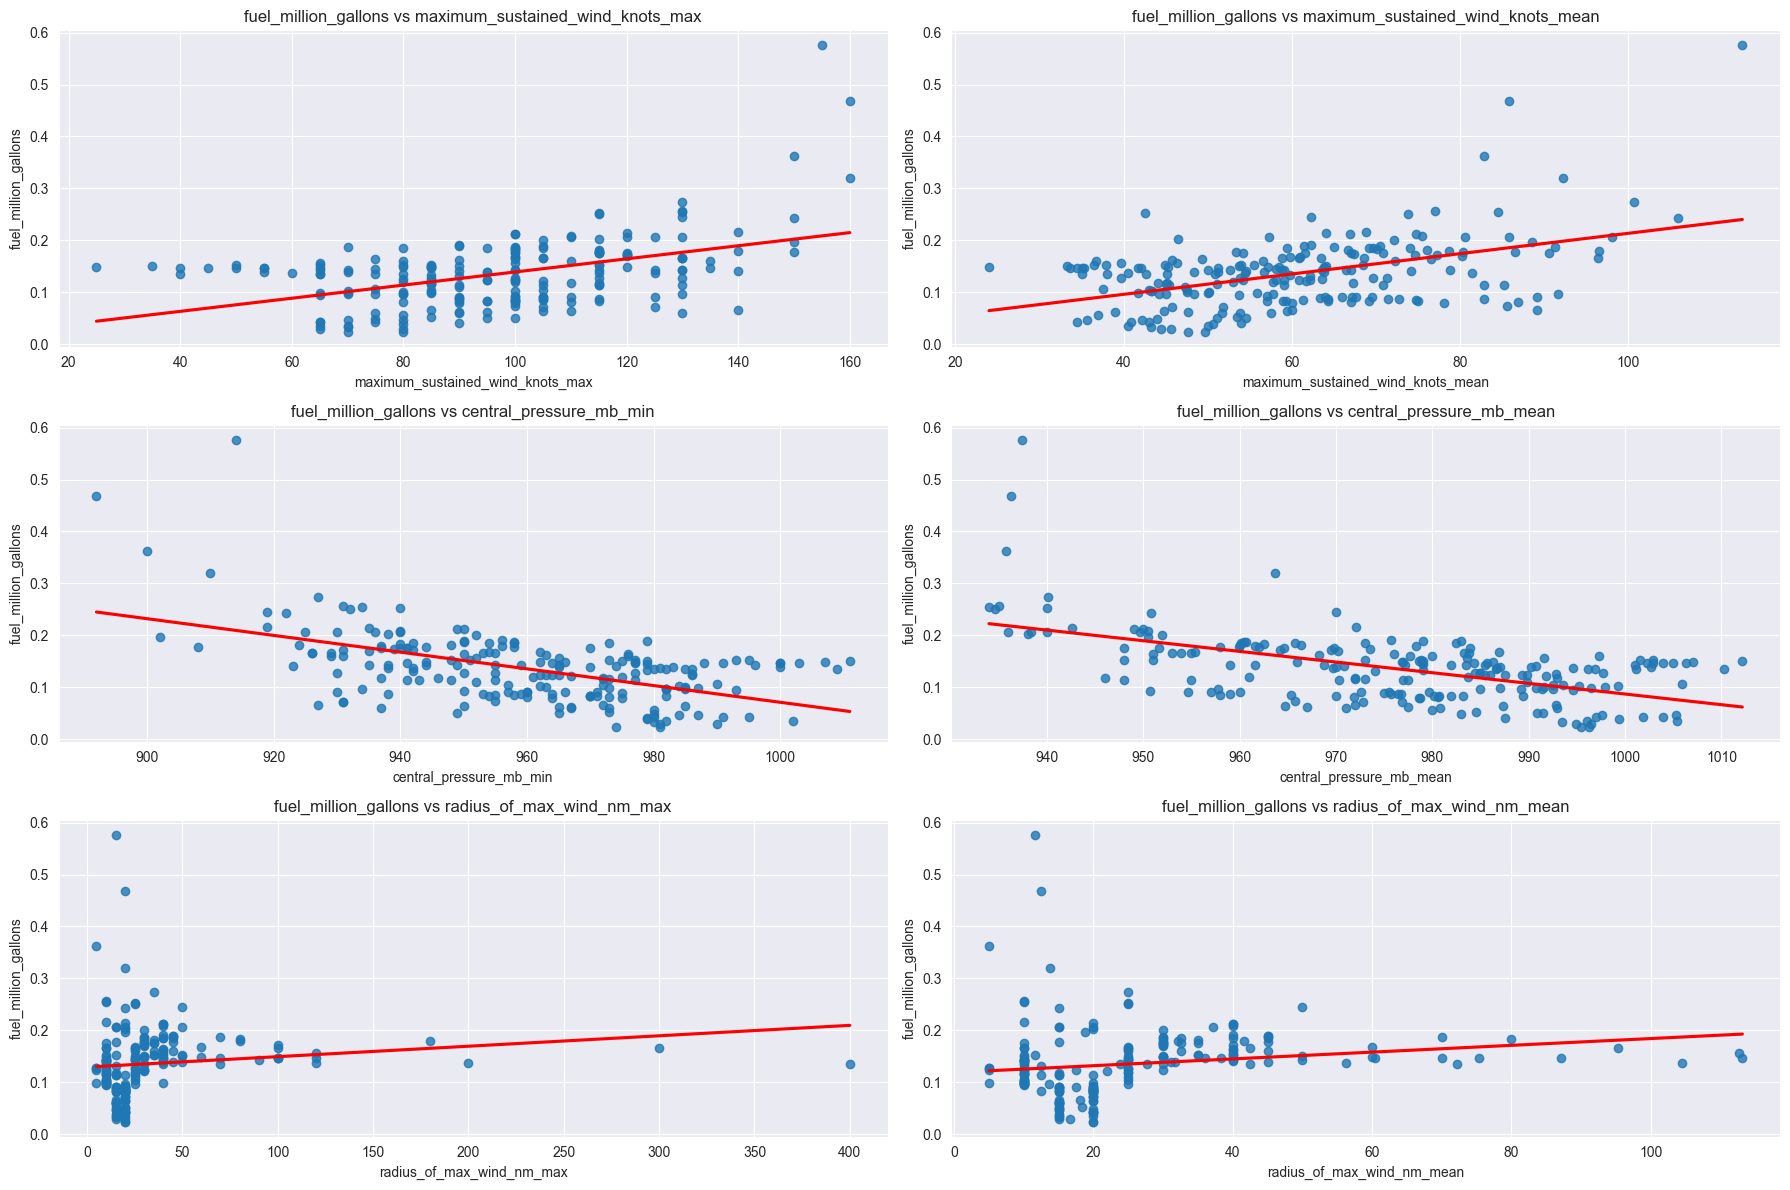

In [26]:
plt.figure(figsize=(8, 6))

x_axis = list(df_resources_with_storm_features.columns[8:])
y_axis = list(df_resources_with_storm_features.columns[3:7])

for y_feature in y_axis:
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))

    axes = axes.flatten()
    for i, x_feature in enumerate(x_axis):
        sns.regplot(
            x=grouped_df_selected[x_feature],
            y=Y_pred_df[y_feature],
            scatter=True,
            fit_reg=True,
            line_kws={'color': 'red'},
            ci=None,
            ax=axes[i]
        )

        axes[i].set_title(f'{y_feature} vs {x_feature}')
        axes[i].set_xlabel(x_feature)
        axes[i].set_ylabel(y_feature)
    plt.tight_layout()
    plt.show()

# Statistical based Data Synthesis

In [27]:
df_resources_with_storm_features.head(5)

,storm_name,category,year,shelters,meals_millions,water_million_gallons,fuel_million_gallons,storm_id,maximum_sustained_wind_knots_max,maximum_sustained_wind_knots_mean,central_pressure_mb_min,central_pressure_mb_mean,radius_of_max_wind_nm_max,radius_of_max_wind_nm_mean
0,CHARLEY,3,2004,250,2.0,0.3,0.1,AL032004,130,85.200000,941.0,977.440000,20.0,12.5
1,FRANCES,3,2004,250,3.5,1.5,0.2,AL062004,120,67.346939,939.0,973.571429,30.0,30.0
2,IVAN,3,2004,120,2.0,0.7,0.2,AL092004,110,36.710526,931.0,997.263158,25.0,25.0
3,JEANNE,-1,2004,200,4.0,1.5,0.2,AL112004,105,61.493506,950.0,982.987013,45.0,45.0
4,DENNIS,-1,2005,70,1.0,0.5,0.1,AL042005,130,53.846154,930.0,984.953846,5.0,5.0
